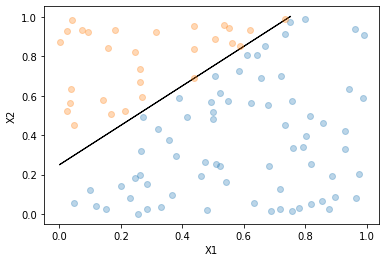

In [74]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(np.array(vetor),rotaciona)
    return perp

def plotahiperplano(vetor, bias=0):
    hiperplano = perpendicular(vetor)
    plt.arrow(*[0,bias], *(hiperplano-bias))

X, y = geradataset(100)
plotadataset(X, y)
plotahiperplano([1,-1],0.25)
plt.show()

In [75]:
class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)


In [76]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=Adaline(), alpha=0.014):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.maxiter = 20
        self.custo = custo
        self.whist = []
        self.chist = []
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.whist.append(self.w)
            self.chist.append(custo)
            if custo==0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
        print(self.w)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred


169.41812785195438
239.1331765604422
175.61826545278697
189.13078082958552
167.45561346280462
166.98121205038865
157.89015132728375
155.06510185929054
150.46953340359954
147.9606836125438
145.32159596368433
143.511418388081
141.88761896039452
140.6620623152921
139.62928170414145
138.81761570101938
138.14992753286177
137.61560368441118
137.17953616866703
136.82714852663818
[ 0.50264265  1.17095959 -1.37782472]
0.95


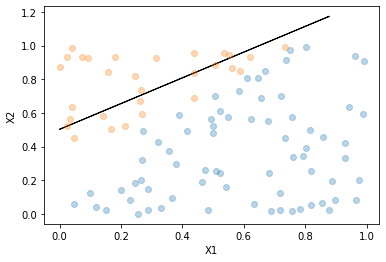

In [77]:
perceptron = Perceptron(alpha=0.01)
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

plotadataset(X, y)
plotahiperplano(perceptron.w[1:],perceptron.w[0])
plt.show()

In [78]:
whist = np.array(perceptron.whist)
chist = np.array(perceptron.chist)
whist, chist

(array([[ 0.19331473, -0.68160861,  0.49540983],
        [ 0.52154114, -0.32847945,  0.4230662 ],
        [ 0.37949358, -0.23972067,  0.13262603],
        [ 0.47590253, -0.04051317, -0.01142505],
        [ 0.44586802,  0.0784445 , -0.20046282],
        [ 0.47792176,  0.21774054, -0.33894975],
        [ 0.47524268,  0.32757172, -0.47894154],
        [ 0.4880753 ,  0.43546172, -0.59612069],
        [ 0.49081191,  0.52888721, -0.70528554],
        [ 0.49691591,  0.61580525, -0.80083888],
        [ 0.49967948,  0.69346638, -0.88749086],
        [ 0.50276754,  0.76450708, -0.96445195],
        [ 0.50447431,  0.82866702, -1.03360067],
        [ 0.50584197,  0.88707102, -1.09528995],
        [ 0.50647749,  0.94003236, -1.15052428],
        [ 0.50671113,  0.98819495, -1.19985101],
        [ 0.50648546,  1.03195325, -1.24394428],
        [ 0.50592974,  1.07175915, -1.28331502],
        [ 0.50506519,  1.10797085, -1.31847043],
        [ 0.50395824,  1.14093712, -1.34984068]]),
 array([169.418127

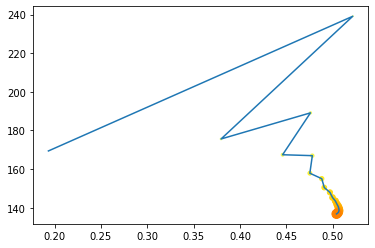

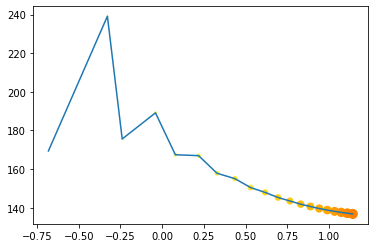

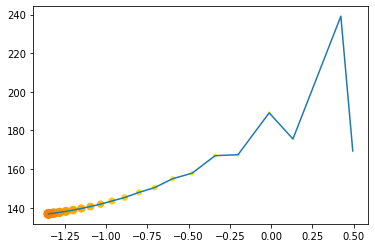

In [79]:
for i in range(whist.shape[1]):
    plt.plot(whist[:,i], chist, '-')
    seq = [j**1.5 for j in range(len(chist))]
    plt.scatter(whist[:,i], chist, s=seq, c=seq, cmap='Wistia')
    idx = np.argsort(whist[:,i])
    # plt.plot(whist[idx,i],chist[idx])
    plt.show()

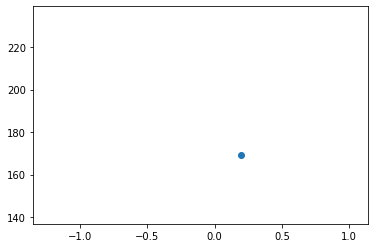

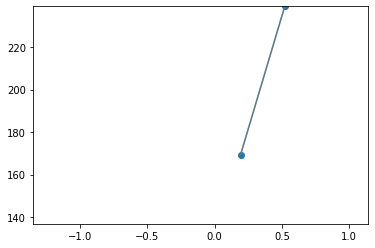

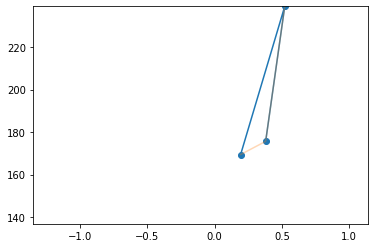

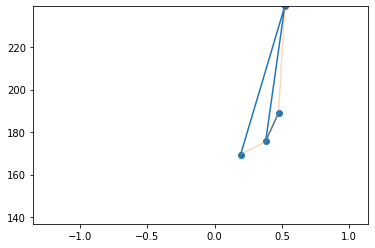

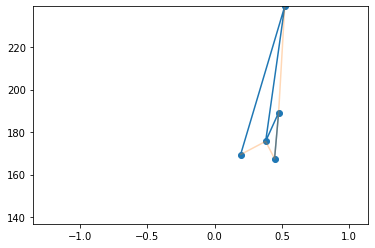

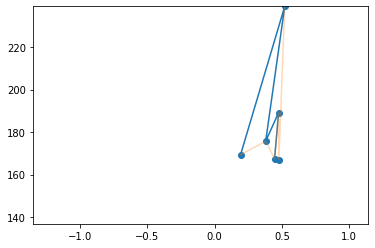

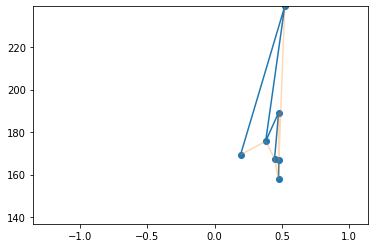

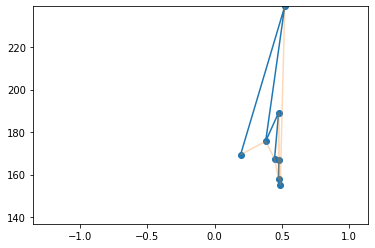

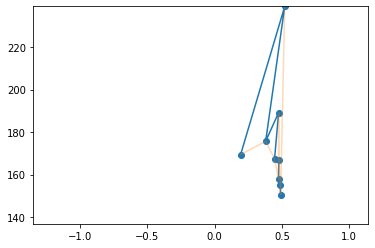

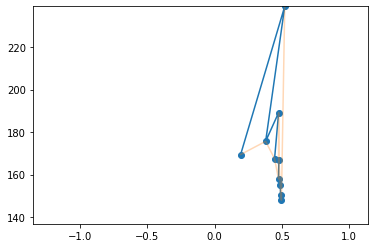

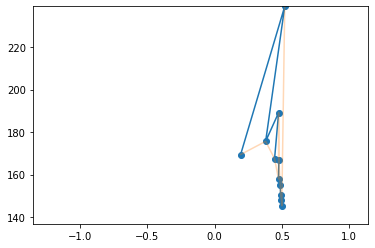

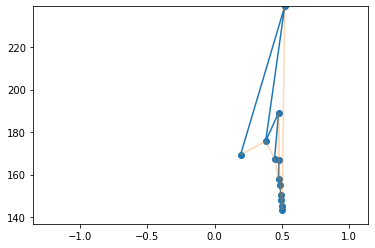

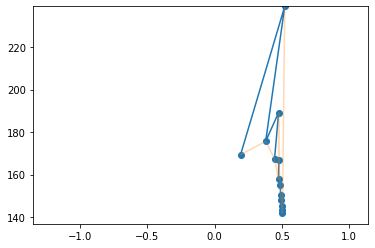

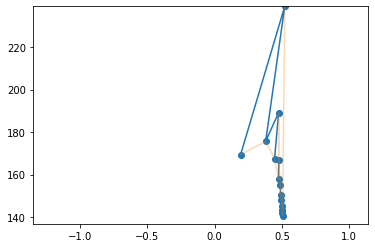

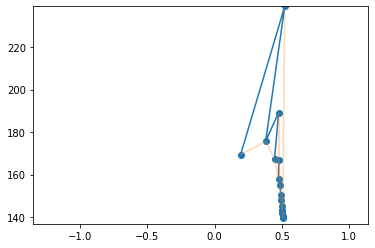

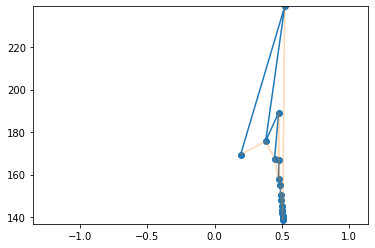

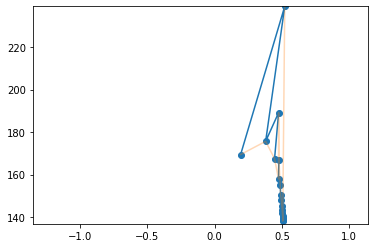

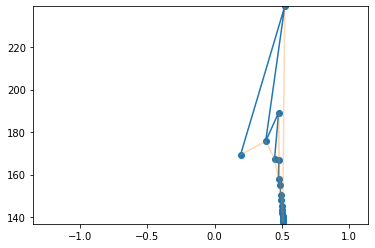

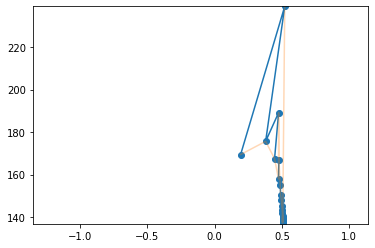

In [80]:
for i in range(1):
    for j in range(1,len(chist)):
        plt.plot(whist[:j,i], chist[:j], 'o-')
        idx = np.argsort(whist[:j,i])
        plt.plot(whist[idx,i], chist[idx], alpha=0.3)
        plt.xlim([np.min(whist), np.max(whist)])
        plt.ylim([np.min(chist), np.max(chist)])
        plt.show()